<a href="https://colab.research.google.com/github/gmauricio-toledo/numerical-methods/blob/master/EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git init
!git pull https://github.com/gmauricio-toledo/numerical-methods.git 

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 137 (delta 64), reused 57 (delta 17), pack-reused 0
Receiving objects: 100% (137/137), 1.41 MiB | 20.90 MiB/s, done.
Resolving deltas: 100% (64/64), done.
From https://github.com/gmauricio-toledo/numerical-methods
 * branch            HEAD       -> FETCH_HEAD


In [32]:
f = lambda x: -2*x**3 + 12*x**2 - 20*x + 8.5

sol = lambda x:-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

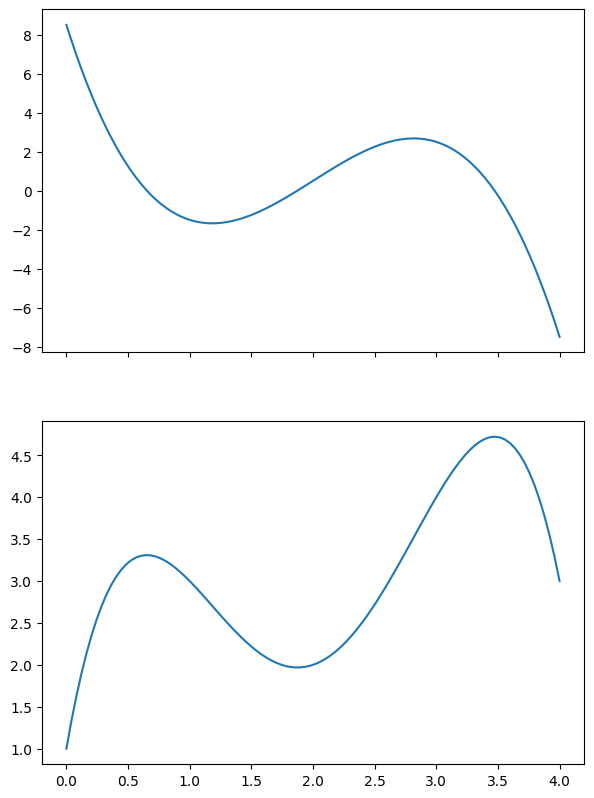

In [31]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(0,4,100)

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(7,10),dpi=100)
ax1.plot(xs,[f(x) for x in xs])
ax2.plot(xs,[sol(x) for x in xs])
fig.show()

Implementación *stand-alone*

In [ ]:
import numpy as np

a = 0
b = 4

h = 0.5

x0 = 0
y0 = 1

n = int((b-a)/h)

xs = np.linspace(a,b,n+1)
ys = np.zeros_like(xs)

ys[0] = y0
for j in range(1,n+1):
    ys[j] = ys[j-1] + f(xs[j-1])*h

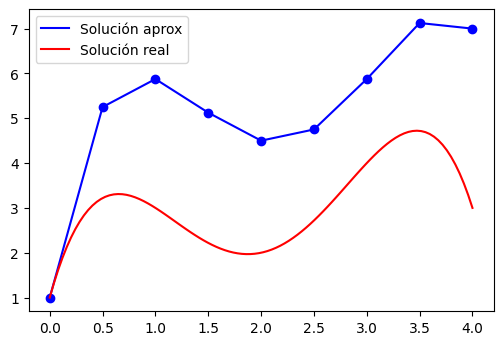

In [ ]:
import matplotlib.pyplot as plt

xaxis = np.linspace(a,b,100)

plt.figure(dpi=100)
plt.plot(xs,ys,color='blue',label='Solución aprox')
plt.scatter(xs,ys,color='blue')
plt.plot(xaxis,[sol(x) for x in xaxis],color='red',label='Solución real')
plt.legend(loc='best')
plt.show()

Como clase

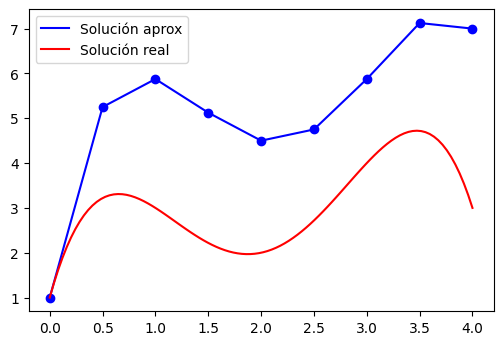

In [35]:
from edo import EulerEDO

f = lambda x: -2*x**3 + 12*x**2 - 20*x + 8.5
sol = lambda x:-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

a = 0
b = 4
h = 0.5
x0 = 0
y0 = 1

solver = EulerEDO(f,sol)
solver.fit(a,b,h,x0,y0,heun=False)
solver.plot(plot_nodes=True)

In [36]:
valores_reales = sol(solver.xs)
errores_relativos = (sol(solver.xs) - solver.ys)/sol(solver.xs)

print_table(solver.xs,solver.ys,valores_reales,errores_relativos)


x	y	y real	error rel
0.0	1.0	1.0	0.0
0.5	5.25	3.219	-0.631
1.0	5.875	3.0	-0.958
1.5	5.125	2.219	-1.31
2.0	4.5	2.0	-1.25
2.5	4.75	2.719	-0.747
3.0	5.875	4.0	-0.469
3.5	7.125	4.719	-0.51
4.0	7.0	3.0	-1.333


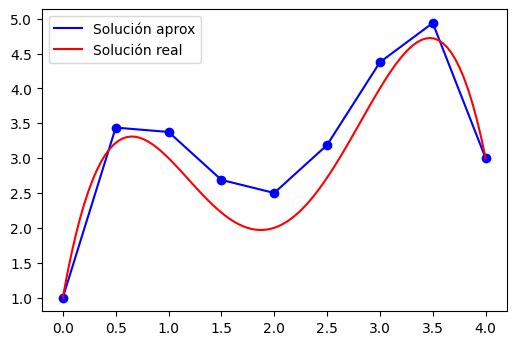

In [19]:
from edo import EulerEDO

f = lambda x: -2*x**3 + 12*x**2 - 20*x + 8.5
sol = lambda x:-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

a = 0
b = 4
h = 0.5
x0 = 0
y0 = 1

solver = EulerEDO(f,sol)
solver.fit(a,b,h,x0,y0,heun=True)
solver.plot(plot_nodes=True)

In [37]:
valores_reales = sol(solver.xs)
errores_relativos = (sol(solver.xs) - solver.ys)/sol(solver.xs)

print_table(solver.xs,solver.ys,valores_reales,errores_relativos)

x	y	y real	error rel
0.0	1.0	1.0	0.0
0.5	5.25	3.219	-0.631
1.0	5.875	3.0	-0.958
1.5	5.125	2.219	-1.31
2.0	4.5	2.0	-1.25
2.5	4.75	2.719	-0.747
3.0	5.875	4.0	-0.469
3.5	7.125	4.719	-0.51
4.0	7.0	3.0	-1.333


In [3]:
from math import sqrt

def f(x,y):
    return (1+4*x)*sqrt(y)

def sol(x):
    return 0.25*(x+2*x**2+2)**2

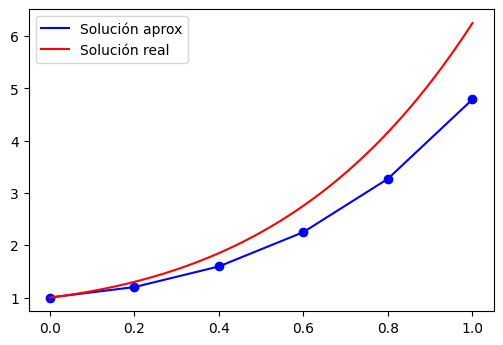

x	y	y real	error rel
0.0	1.0	1.0	0.0
0.2	1.2	1.3	0.077
0.4	1.594	1.85	0.138
0.6	2.251	2.756	0.183
0.8	3.271	4.162	0.214
1.0	4.79	6.25	0.234


In [8]:
from edo import EulerEDOxy, print_table

a=0
b=1
h=0.2
x0 = 0
y0 = 1

solver = EulerEDOxy(f,sol=sol)
solver.fit(a,b,h,x0,y0,heun=False)
solver.plot(plot_nodes=True)

valores_reales = sol(solver.xs)
errores_relativos = (sol(solver.xs) - solver.ys)/sol(solver.xs)
print_table(solver.xs,solver.ys,valores_reales,errores_relativos)

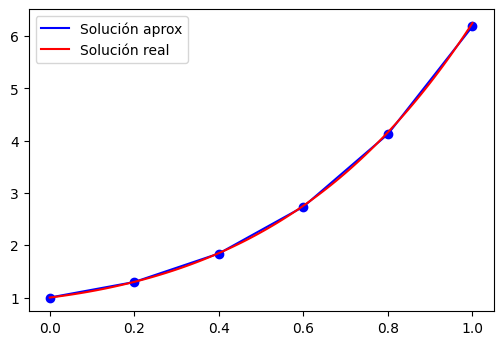

x	y	y real	error rel
0.0	1.0	1.0	0.0
0.2	1.297	1.3	0.002
0.4	1.842	1.85	0.004
0.6	2.737	2.756	0.007
0.8	4.125	4.162	0.009
1.0	6.186	6.25	0.01


In [7]:
from edo import EulerEDOxy

a=0
b=1
h=0.2
x0 = 0
y0 = 1

solver = EulerEDOxy(f,sol=sol)
solver.fit(a,b,h,x0,y0,heun=True)
solver.plot(plot_nodes=True)

valores_reales = sol(solver.xs)
errores_relativos = (sol(solver.xs) - solver.ys)/sol(solver.xs)
print_table(solver.xs,solver.ys,valores_reales,errores_relativos)